# Using SURFsara IoT platform for Sensemakers - demo #2

This notebook shows how to:
- access files in the shared volume
- load CSV files into a pandas DataFrame
- perform simple data manipulations
- inspect data
- produce plots
- store results in the project volume for later use

## Accessing files in the shared volume

The messages processed by the automated data pipeline are written into the shared volume. The individual messages are appended to files for a given project/device and a calendar date. Every night, a summary CSV file is written for each project with the naming convention `/data/app_id/app_id-YYYY-MM-DD.json`. The shared volume is accessible from Jupyter notebooks in read-only mode under `/home/shared`.

The files in the shared volume can be listed in the following way:

In [1]:
!ls /home/shared/WON/*.csv

/home/shared/WON/WON-2020-01-18.csv  /home/shared/WON/WON-2020-01-23.csv
/home/shared/WON/WON-2020-01-19.csv  /home/shared/WON/WON-2020-01-24.csv
/home/shared/WON/WON-2020-01-20.csv  /home/shared/WON/WON-2020-01-25.csv
/home/shared/WON/WON-2020-01-21.csv  /home/shared/WON/WON-2020-01-26.csv
/home/shared/WON/WON-2020-01-22.csv


The files contain messages in the CSV format.

In [2]:
!head /home/shared/WON/WON-2020-01-18.csv

app_id,dev_id,time,hum,temp,datetime
WON,SMA-A429B0,1579384632113,41,24,2020-01-18 21:57:12.113
WON,SMA-A429B0,1579384663061,41,24,2020-01-18 21:57:43.061
WON,SMA-A429B0,1579384693615,41,24,2020-01-18 21:58:13.615
WON,SMA-A429B0,1579384724612,45,25,2020-01-18 21:58:44.612
WON,SMA-A429B0,1579384755529,45,25,2020-01-18 21:59:15.529
WON,SMA-A429B0,1579384774964,41,25,2020-01-18 21:59:34.964
WON,SMA-A429B0,1579384805745,42,25,2020-01-18 22:00:05.745
WON,SMA-A429B0,1579384836615,42,24,2020-01-18 22:00:36.615
WON,SMA-A429B0,1579384867263,42,24,2020-01-18 22:01:07.263


## Load data from the CSV files into a pandas DataFrame

We choose to use [pandas](https://pandas.pydata.org/) DataFrame - a popular framework for analysing data. First, we need to install the corresponding Python package.

In [3]:
!pip install --upgrade pip
!pip install pandas

Requirement already up-to-date: pip in /opt/conda/lib/python3.6/site-packages (20.0.2)


A file from the shared volume can be loaded into a datafrime like this with a single command:

In [4]:
import pandas as pd

# Load a single CSV file into a Pandas DataFrame.
df = pd.read_csv('/home/shared/WON/WON-2020-01-18.csv', parse_dates=["datetime"], index_col="datetime")

# Show the datafame.
df

,app_id,dev_id,time,hum,temp
datetime,,,,,
2020-01-18 21:57:12.113,WON,SMA-A429B0,1579384632113,41,24
2020-01-18 21:57:43.061,WON,SMA-A429B0,1579384663061,41,24
2020-01-18 21:58:13.615,WON,SMA-A429B0,1579384693615,41,24
2020-01-18 21:58:44.612,WON,SMA-A429B0,1579384724612,45,25
2020-01-18 21:59:15.529,WON,SMA-A429B0,1579384755529,45,25
...,...,...,...,...,...
2020-01-18 23:57:45.862,WON,SMA-A429B0,1579391865862,40,23
2020-01-18 23:58:16.734,WON,SMA-A429B0,1579391896734,40,23
2020-01-18 23:58:47.400,WON,SMA-A429B0,1579391927400,40,23


Multiple files can be loaded like this:

In [5]:
import glob

# List all files for project WON.
files = glob.glob('/home/shared/WON/*.csv')

# Define an empty dataframe.
df0 = pd.DataFrame()

# Loop over all files and load them to the dataframe.
for file in files:
    tmp = pd.read_csv(file, parse_dates=["datetime"], index_col="datetime")
    df0 = pd.concat([df0, tmp], axis=0, sort=False)

# Sort by time.
df0.sort_index(inplace=True)

# Show the dataframe.
df0

,app_id,dev_id,time,CO2,hum,light,meas_time,temp,watertemp
datetime,,,,,,,,,
2020-01-18 21:57:12.113,WON,SMA-A429B0,1579384632113,NaN,41.000000,NaN,NaN,24.0,NaN
2020-01-18 21:57:43.061,WON,SMA-A429B0,1579384663061,NaN,41.000000,NaN,NaN,24.0,NaN
2020-01-18 21:58:13.615,WON,SMA-A429B0,1579384693615,NaN,41.000000,NaN,NaN,24.0,NaN
2020-01-18 21:58:44.612,WON,SMA-A429B0,1579384724612,NaN,45.000000,NaN,NaN,25.0,NaN
2020-01-18 21:59:15.529,WON,SMA-A429B0,1579384755529,NaN,45.000000,NaN,NaN,25.0,NaN
...,...,...,...,...,...,...,...,...,...
2020-01-26 23:55:05.570,WON,AstroPlantExplorer.Ted,1580082905570,722.0,41.599998,0.833333,2020-01-27 00:55:04,21.6,20.750
2020-01-26 23:56:15.249,WON,AstroPlantExplorer.Ted,1580082975249,722.0,41.500000,0.833333,2020-01-27 00:56:13,21.6,20.750
2020-01-26 23:57:24.928,WON,AstroPlantExplorer.Ted,1580083044928,721.0,41.500000,0.833333,2020-01-27 00:57:23,21.6,20.750


The following commands may come handy for getting basic information about the dataframe.

In [6]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23027 entries, 2020-01-18 21:57:12.113000 to 2020-01-26 23:59:44.208000
Data columns (total 9 columns):
app_id       23027 non-null object
dev_id       23027 non-null object
time         23027 non-null int64
CO2          5781 non-null float64
hum          23024 non-null float64
light        6576 non-null float64
meas_time    5788 non-null object
temp         23024 non-null float64
watertemp    6576 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
# Show the first few lines of the dataframe.
df0.head()

,app_id,dev_id,time,CO2,hum,light,meas_time,temp,watertemp
datetime,,,,,,,,,
2020-01-18 21:57:12.113,WON,SMA-A429B0,1579384632113,NaN,41.0,NaN,NaN,24.0,NaN
2020-01-18 21:57:43.061,WON,SMA-A429B0,1579384663061,NaN,41.0,NaN,NaN,24.0,NaN
2020-01-18 21:58:13.615,WON,SMA-A429B0,1579384693615,NaN,41.0,NaN,NaN,24.0,NaN
2020-01-18 21:58:44.612,WON,SMA-A429B0,1579384724612,NaN,45.0,NaN,NaN,25.0,NaN
2020-01-18 21:59:15.529,WON,SMA-A429B0,1579384755529,NaN,45.0,NaN,NaN,25.0,NaN


In [8]:
# Show the types of the columns.
df0.dtypes

app_id        object
dev_id        object
time           int64
CO2          float64
hum          float64
light        float64
meas_time     object
temp         float64
watertemp    float64
dtype: object

## Simple data manipulations

In the previous section, we loaded all raw data files in dataframe `df0`. In the following cell, we will create a new dataframe `df1` that will be handy for analysing.

In [9]:
df1 = df0

## Data inspection

In the previous section, we created dataframe `df1` that is convenient for analysis/inspection. In this section, we can start inspecting the data and perform some data cleaning.

Basic statistics for the data from numeric columns can be shown like this:

In [10]:
df1.describe()

,time,CO2,hum,light,temp,watertemp
count,2.302700e+04,5781.000000,23024.000000,6576.000000,23024.000000,6576.000000
mean,1.579711e+12,150.387995,40.018172,57.824285,22.326229,19.832025
std,1.790512e+08,267.505195,3.575159,151.724804,1.768698,1.353683
min,1.579385e+12,0.000000,30.299999,0.000000,13.200000,14.875000
25%,1.579562e+12,0.000000,37.400002,0.833333,21.700001,19.437000
50%,1.579728e+12,0.000000,39.000000,0.833333,23.000000,19.937000
75%,1.579840e+12,430.000000,41.000000,73.333333,23.000000,20.562000
max,1.580083e+12,1195.000000,59.000000,3705.000000,26.000000,25.312000


Remove data where CO2 = 0.

In [11]:
df2 = df1[df1["CO2"] > 0]

## Data visualisations

We choose to use [matplotlib](https://matplotlib.org/) to draw graphs and histograms. First, we need to install the corresponding Python package.

In [12]:
!pip install matplotlib

Make sure the plots will be produced directly in the notebook. This line is usually specified at the top of each notebook.

In [13]:
%matplotlib inline

Plot histograms for humidity and temperature:

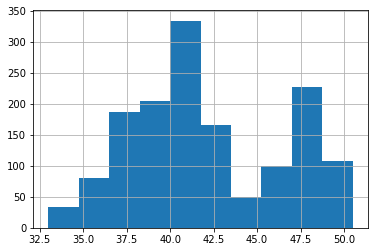

In [14]:
df2["hum"].hist();

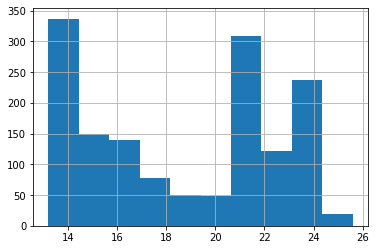

In [15]:
df2["temp"].hist();

The temperature histogram confirms there are outliers with high values. They cannot be seen by eye in the linear y-axis scale, they will only become apparent in a histogram with the logarithmic y-axis.

Box plots are useful show the basic statistics for the distributions, similar to what we achieved with `df.describe` previously.

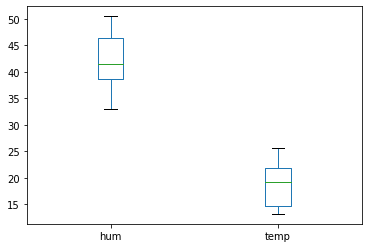

In [16]:
df2[["hum", "temp"]].plot.box();

The temperature can be plotted against time like this:

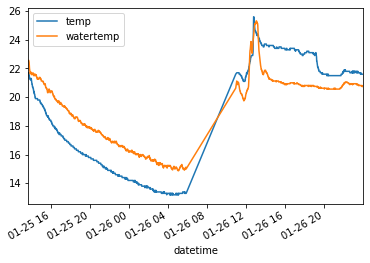

In [17]:
df2.plot(y=["temp", "watertemp"]);

## Store results in the project volume

After data investigations/analysis in a notebook, we may want to save our results (data or plots) for later use/as a reference. This is what the project volume is for.

The example below shows how to save a plot of the humidity measurements after 26/01/2020 as a pdf file. The file can be downloaded from the file browser on the left.

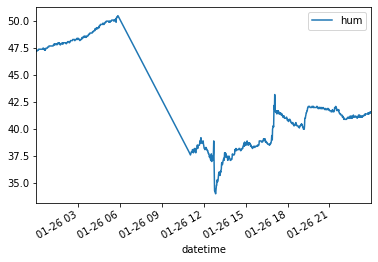

In [18]:
plot = df2[df2.index > '2020-01-26'].plot(y="hum")
plot.get_figure().savefig('humidity.pdf', format='pdf')